## The Presence of Heart Disease and the Underlying Factors

**Introduction:** 

"Heart disease” refers to several types of heart conditions that can affect the operations of the heart muscle, including blood vessel disease, coronary artery disease, Heart rhythm problems, congenital heart defects, heart valve disease, disease of the heart muscle and heart infection. The most common of these is coronary artery disease, which affects the blood flow to the heart that can result in heart attacks and heart failure. Risk of heart disease can be influenced by many factors including, age, high blood pressure, and high blood cholesterol levels. Growing older increases the risk of damaged and narrowed arteries and a weakened or thickened heart muscle, therefore, individuals older in age are more likely to have heart disease. Moreover, uncontrolled high blood pressure can result in hardening and thickening of your arteries, narrowing the vessels through which blood flows, increasing an individual's likelihood of having heart disease. Additionally, important symptoms to notice in individuals who have heart disease are the type of chest pain they are having, as angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood(feels like pressure or squeezing in your chest). Angina chest pain along with irregular heartbeats in an individual can strongly indicate that they might have heart disease. 

Due to age, high blood pressure, high cholesterol being major risk factors of heart disease and the type of chest pain along with irregular heart beats being an important symptom of heart disease we decided that these factors would best predict the presence of heart disease in an individual. Our question is as follows:

**Can we use the age, blood pressure, and cholesterol levels, type of chest pain and heart rate of an individual to predict whether or not they have heart disease?**
 
This dataset shows information about several individuals that could contribute to heart disease, like blood pressure, chest pain, age, sex, blood sugar, heart rate, e.t.c, and whether or not they have heart disease. The goal of this database is to determine the presence of heart disease in a patient. This goal is represented by the POHD field, which refers to the presence of heart disease in an individual. It is an integer valued from 0 (no presence) to 4. Experiments with this database have focused on distinguishing presence of heart disease (a value from 1 through 4) from absence (0). In this database, sex is represented by integer values, with 0 representing female and 1 representing male. The serum_cholestoral field represents serum cholesterol in mg/dl. The chest_pain_type field is represented by integer values ranging from 1-4. A value of 1 indicates typical angina, 2 is atypical angina, 3 is non-anginal pain, and 4 is asymptomatic. 


***Load all libraries needed for data analysis**

It is important that you load all the libraries below inorder to ensure that all of the functions needed to perform the data analysis for heart disease are loaded into tidyverse. 

In [1]:
 if (!require("pacman")) install.packages("pacman")
pacman::p_load(knitr, captioner, bundesligR, stringr)

Loading required package: pacman



In [2]:
#load_libraries

library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(testthat)
library(digest)
library(cowplot)
library(GGally)
library(captioner)


options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0

In [39]:
figure_nums <- captioner(prefix = "Figure")

figure_1_title <- figure_nums("heart_disease_data1", "Heart Disease Data")

figure_2_title <- figure_nums("heart_disease_data2", 'Heart Disease Data Cleaned and Wrangled')

figure_3_title <- figure_nums("heart_disease_train", "Heart Disease Training Data")

figure_4_title <- figure_nums("summerized_POHD", "Summarized Values of Heart Disease")

figure_5_title <- figure_nums("mean_variables", "Mean of Each Variable Used in Classification")

figure_6_title <- figure_nums("heart_disease_scaled", "Scaled Heart Disease Data")

figure_7_title <- figure_nums("Heart_diseas_predictions", "possible k values and thier corresponding data")

figure_8_title <- figure_nums("best_k_vlue", "K value with the Highest Accuracy")

figure_9_title <- figure_nums("mean_accracy_best_k", "accuracy of best k value")

figure_10_title <- figure_nums("heart_disase_fit", "heart Disease Workflow")

figure_11_title <- figure_nums("plot_e", "")

figure_12_title <- figure_nums("Heart_disease_predictions", "Possible K Values and Their Corresponding Data")

figure_13_title <- figure_nums("Heart_disease_preictions", "possible k vlaues and their corresponding data")

figure_14_title <- figure_nums("best_k_value", "K Value With the Highest Accuracy")

figure_15_title <- figure_nums("mean_accuracy_best_k", "Accuracy of Best K Value")

figure_16_title <- figure_nums("heart_disease_fit", "Heart Disease Workflow")

figure_17_title <- figure_nums("percent_accuracy", "Accuracy of Model")

figure_18_title <- figure_nums("heart_conf_mat", "Configuration Matrix of Model")

figure_19_title <- figure_nums("plot_grid(graphN, graphP)", "Visualization of Model")

**1) Load data for analysis**

We read in all the datasets available to us, using the same source to collect this information. We then combine them together creating a larger data set to use in our analysis. In each data set we convert NA's in each column to question marks. This ensures that our data is usable and that our analysis does not lead to major errors. Additionally, we created informative and readable column names to be able to determine what each column represents and which column should be kept for our data analysis. 

In [4]:
set.seed(1234)
#We have read in and combined all datasets and tidied the data. 
#The NAs in the datasets are replaced with question marks.

cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
hungary_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
switzerland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
va_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

cleveland_data <- read_csv(cleveland_url, col_names = FALSE, na = "?")
hungary_data <- read_csv(hungary_url, col_names = FALSE, na = "?")
switzerland_data <- read_csv(switzerland_url, col_names = FALSE, na = "?")
va_data <- read_csv(va_url, col_names = FALSE, na = "?")

heart_disease_data1 <- full_join(cleveland_data, hungary_data) %>%
    full_join(switzerland_data) %>%
    full_join(va_data)

colnames(heart_disease_data1) <- c("Age", "Sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestorol", "fasting_blood_sugar", "resting_electrocardiographic_results",
                "maximum_heart_rate" , "exercise_induced_angina" , "oldpeak" , "slope" , "ca" , "thal" , "POHD")

figure_1_title
heart_disease_data1

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
 

[1] "Figure  1: Heart Disease Data"

Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholestorol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,POHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1


**2) Clean and wrangle data into a tidy format that can be used for the analysis**

In our data set, the presence of heart disease column (POHD) has been mutated with the purpose of  distinguishing the presence of heart disease (positive) from lack of heart disease (negative). We then selected the desired columns for our analysis which include; the factors we wish to use for our classification(age, chest pain type, serum cholesterol levels, resting blood pressure, maximum heart rate) along with the column we are trying to predict which is the presence of heart disease. We then remove the NA's in our data in order to clean the data to make it usable for our data analysis.

In [5]:
set.seed(1234)

POHD2 <- mutate(heart_disease_data1, Presence_of_Heart_Disease = ifelse(POHD>0, "P", "N"))

#select for desired columns
heart_data <- POHD2 %>%
                    select(Age, chest_pain_type, serum_cholestorol, Presence_of_Heart_Disease, resting_blood_pressure, maximum_heart_rate) %>%
                    mutate(Presence_of_Heart_Disease = as_factor(Presence_of_Heart_Disease))
#remove NAs
heart_disease_data2 <- na.omit(heart_data)

figure_2_title
heart_disease_data2

[1] "Figure  2: Heart Disease Data Cleaned and Wrangled"

Age,chest_pain_type,serum_cholestorol,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
63,1,233,N,145,150
67,4,286,P,160,108
67,4,229,P,120,129
⋮,⋮,⋮,⋮,⋮,⋮
54,4,333,P,127,154
55,4,223,P,122,100
62,2,254,P,120,93


**3) Split data into testing or training data**

We set the seed when splitting our data to ensure that it is reproducible and the rest of the code follows the same seed. We then split our data into training and testing data to ensure that we can determine how accurate our model is. Without setting the seed in each cell, we would receive different results each time we run the cell. The resulting table is our training data that we will use to train our model. We must seperate our data so that no data point is used in both training and testing.

In [6]:
set.seed(1234)


heart_disease_split <- initial_split(heart_disease_data2, prop = 0.70, strata = Presence_of_Heart_Disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

figure_3_title
heart_disease_train

[1] "Figure  3: Heart Disease Training Data"

Age,chest_pain_type,serum_cholestorol,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
63,1,233,N,145,150
67,4,286,P,160,108
67,4,229,P,120,129
⋮,⋮,⋮,⋮,⋮,⋮
46,4,310,P,134,126
54,4,333,P,127,154
55,4,223,P,122,100


**4) Summarize the data into tables that are relevant to our analysis**

We summarized our data into two tables. The first table summarizes the total number of variables corresponding to positive and negative heart disease in our data. The second table summarizes the average of each column that we are using in our data analysis.


In [7]:
#useful Tables 
set.seed(1234)


summerized_POHD <- heart_disease_train %>%
    group_by(Presence_of_Heart_Disease) %>%
    summarize("Number of variable"= n()) 

mean_variables <- summarize(heart_disease_train,
                           "Mean Age" = mean(Age),
                           "Mean serum cholestoral" = mean(serum_cholestorol),
                           "Mean Chest Pain Type" = mean(chest_pain_type),
                           "Mean Resting Blood Pressure" = mean(resting_blood_pressure), 
                           "Mean maximum heart rate" = mean(maximum_heart_rate)) 
figure_4_title
summerized_POHD
figure_5_title
mean_variables

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Figure  4: Summarized Values of Heart Disease"

Presence_of_Heart_Disease,Number of variable
<fct>,<int>
N,262
P,323


[1] "Figure  5: Mean of Each Variable Used in Classification"

Mean Age,Mean serum cholestoral,Mean Chest Pain Type,Mean Resting Blood Pressure,Mean maximum heart rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.78291,197.2325,3.261538,131.3744,137.9812


The first table shows the number of rows that correspond to positive and negative POHD values, which can be used to see that we have similar numbers of positive and negative values for heart disease presence; therefore, upsampling is not needed. 

The second table shows the mean values of our predictors, which can be useful in determining the average of each factor in the population. This can allow you to make the inference that if an individual's observations greatly differ from the averages of the population that they may be at a greater risk of heart disease. 

**5) Created a recipe and scaled our data**

Below we created a recipe for our data and scaled and center our predictors to make sure that they were of equal importance when performing our data analysis. Making them of equal importance ensures that no one predictor outweighs another due to differences in magnitude. We then applied this recipe to our data set. The following table is the table after being scaled and centered such that each column has an average of 0 and the range is between -1 and 1.

In [8]:
#scaled Data 
set.seed(1234)

heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestorol + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train)

figure_6_title
heart_disease_scaled


[1] "Figure  6: Scaled Heart Disease Data"

Age,serum_cholestorol,chest_pain_type,resting_blood_pressure,maximum_heart_rate,Presence_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.104695,0.3196716,-2.3762322,0.7565583,0.4597353,N
1.537184,0.7933581,0.7759126,1.5894274,-1.1468209,P
1.537184,0.2839216,0.7759126,-0.6315568,-0.3435428,P
⋮,⋮,⋮,⋮,⋮,⋮
-0.7333831,1.0078577,0.7759126,0.1457877,-0.4582968,P
0.1315949,1.2134197,0.7759126,-0.2428845,0.6127407,P
0.2397172,0.2302968,0.7759126,-0.5205076,-1.4528316,P


**6) Created visualization of our analysis**

Below we created histograms to visualise the relationship between our factors and the presence of heart disease in an individual. We used histograms because we decided that it would represent our data the best and it would be easier to understand.

Warning message:
“Removed 14 rows containing missing values (geom_bar).”
Warning message:
“Removed 42 rows containing missing values (geom_bar).”


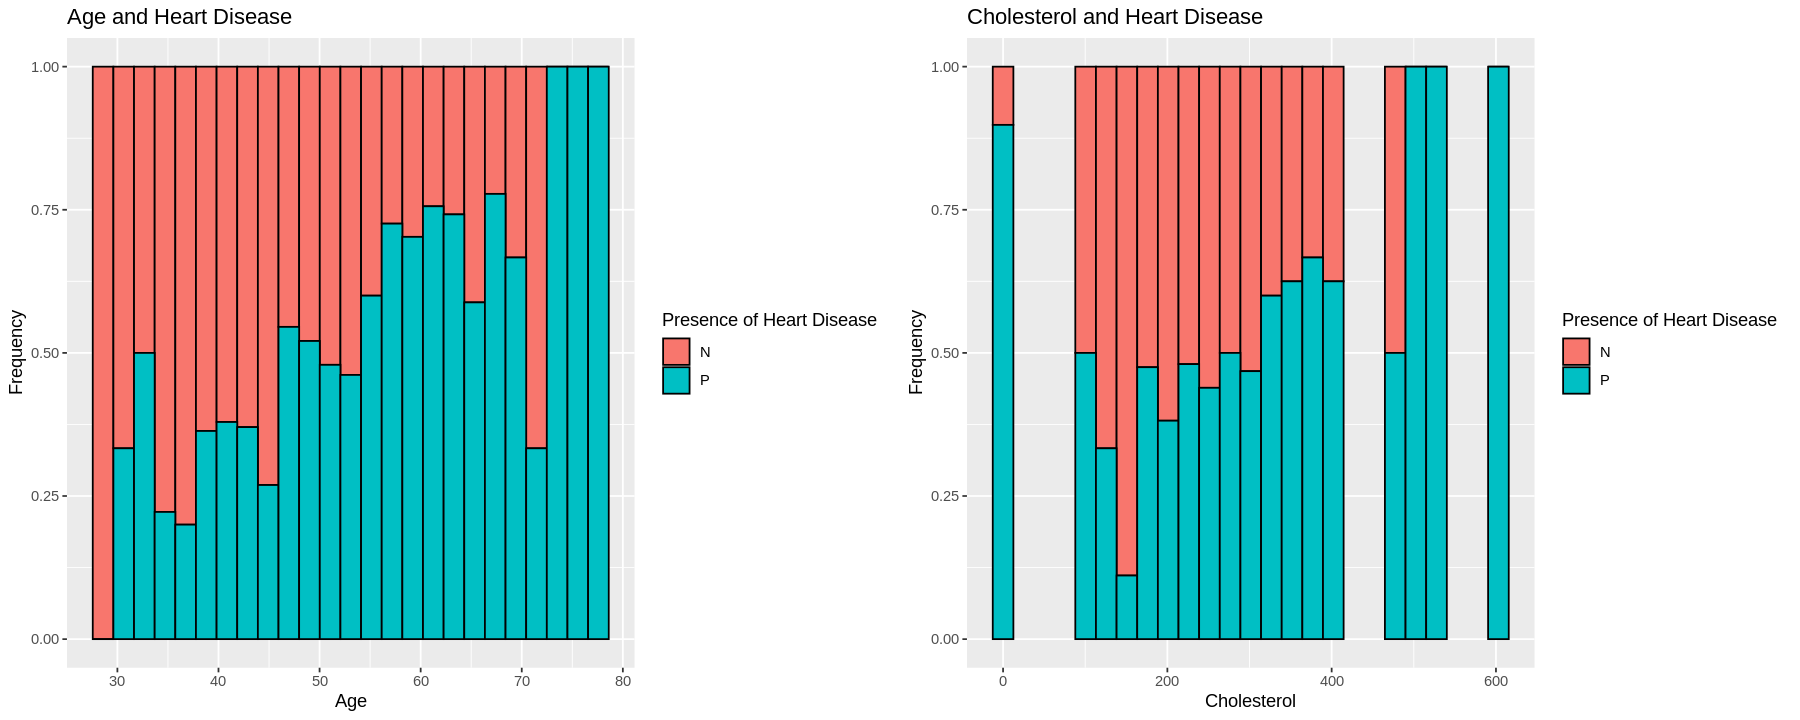

[1] "Figure 7                                              Figure 8"


Warning message:
“Removed 8 rows containing missing values (geom_bar).”


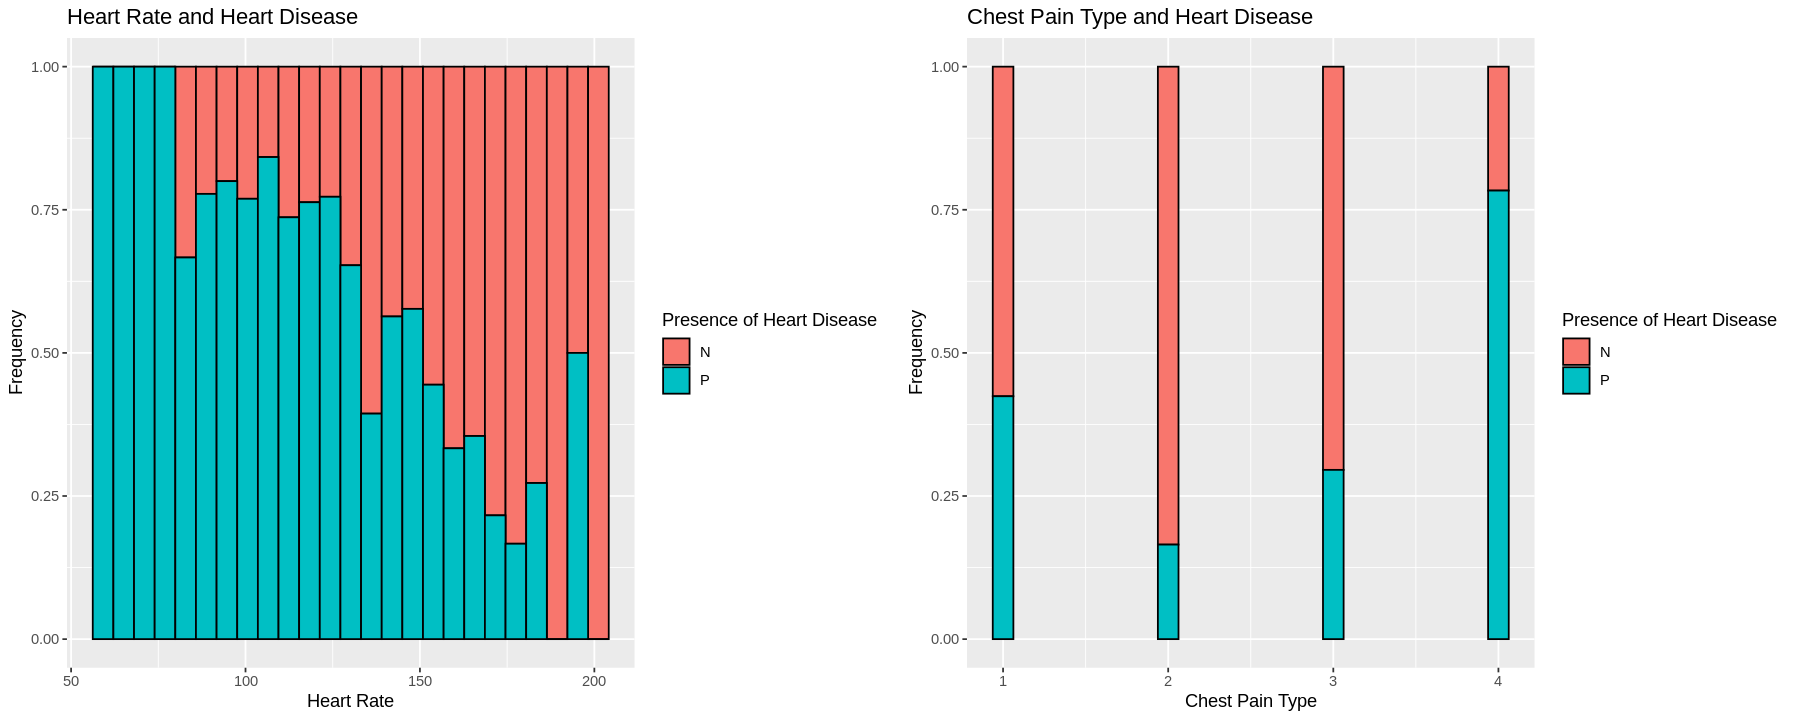

[1] "Figure 9                                              Figure 10"


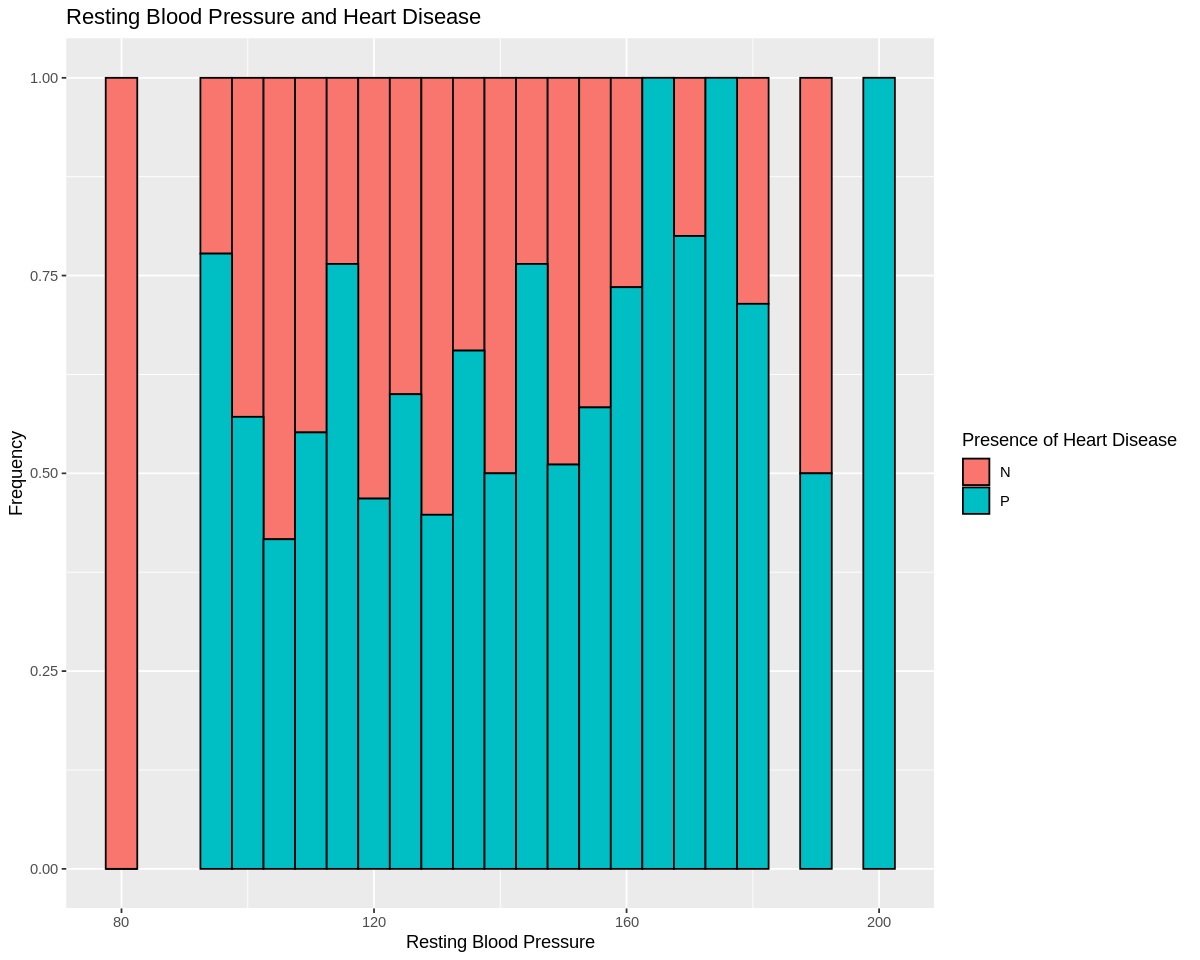

In [38]:
options(repr.plot.width = 15, repr.plot.height = 6)
set.seed(1234)


plot_a <- heart_disease_train %>%
    ggplot(aes(x = Age, fill = Presence_of_Heart_Disease)) + 
    geom_histogram(position = 'fill', color = "black", bins = 25) + 
    xlab("Age") +
    ylab("Frequency") +
    labs(fill = "Presence of Heart Disease") +
    ggtitle("Age and Heart Disease") 

plot_b <- heart_disease_train %>%
   ggplot(aes(x = serum_cholestorol, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Cholesterol") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Cholesterol and Heart Disease") 

plot_c <- heart_disease_train %>%
   ggplot(aes(x = maximum_heart_rate, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Heart Rate") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Heart Rate and Heart Disease") 

plot_d <- heart_disease_train %>%
   ggplot(aes(x = chest_pain_type, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Chest Pain Type") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Chest Pain Type and Heart Disease") 

plot_e <- heart_disease_train %>%
   ggplot(aes(x = resting_blood_pressure, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Resting Blood Pressure") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Resting Blood Pressure and Heart Disease") 

plot_grid(plot_a, plot_b)
plot_grid(plot_c, plot_d)
print("Figure 7                                              Figure 8")
options(repr.plot.width = 10, repr.plot.height = 8)
plot_e
print('Figure 9                                              Figure 10')

'Figure 11'

**_Interpretations_**

Histograms are used to visualize our data as they show the relationship between our predictors and presence of heart disease. This lets us clearly see how each predictor impacts risk of heart disease. The predictor values have been scaled to ensure that all observations will be on a comparable scale. The plots show that age, cholesterol, heart rate, chest pain type, and resting blood pressure are good predictors; and that Chest Pain Type and Resting Blood Pressure and reasonably good predictors to be included in our model. We used our original unscaled data to give more meaning to the predictors since it is easier to understand the graph in their unscaled state. 

On the Age and Heart Disease Graph you can still see that as age increases the Presence of heart disease among the individuals increases as well. Creating a strong positive linear relationship with few anomalies between these variables, making it a good predictor to use in our model.

On the Cholesterol and Heart Disease Graph it can be observed that increased levels of cholesterol leads to more individuals with heart disease. It is a strong positive linear relationship. This also would make this variable a good predictor in our model. 

Moreover, resting heart rate follows this same pattern, on the heart rate and heart disease graph because as the resting heart rate increases so does the amount of individuals with heart disease. This means it has a strong negative linear relationship.

On the Chest Pain Type and Heart Disease you can observe that there are significantly more heart disease found in patients with a certain type of chest pain (4); therefore, this leads to this variable also being an important one in our mode. This is a medium strengthed positive linear relationship.

On the Chest Pain Type and Heart Disease, as resting blood pressure increases the presence of heart disease also increases. Although this is a weaker relationship, than the other variables it would still be beneficial to include in our data analysis. The graph is a medium strengthed positive relationship.

# Data Analysis 

**1) Perform  K-Nearest Neighbors Classification steps**

a) Created a nearest_neighbors model specification, with neighbors = tune() to be able to determine which value of k creates the most accurate model and weight_func = "rectangular" as the model we want to fit.

b) Split out overall training data into evenly-sized validation sets used to evaluate the best k value, using 5 folds.

c) Created a data frame with neighbors variable that contains the sequence of values of k to try. Here we are testing values from 1-30.

d) Added model and recipe to workflow

i) Used tune_grid function to fit the model for a range of values, and in the grid argument, we specified the range of k values that we pre-determined in step c.

ii) Used the collect_metrics function to aggregate the mean and standard error of the classifiers validation accuracy across the folds.

iii) Filtered for the accuracy listed under the .metric column

**We have created a table below with the k values and their accuracies in order for us to determine which k value to use.**


In [40]:
# a) created a nearest_neighbor model
set.seed(1234)

knn_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#b created a validation sets
heart_disease_vfold <- vfold_cv(heart_disease_train, v=5, strata = Presence_of_Heart_Disease)
                              
#c creating a data table with possible k values
k_vals <- tibble(neighbors = seq(from=1, to=30))

#d these steps together in a workflow and compute the accuracy of 
Heart_disease_predictions <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(knn_model) %>%
    tune_grid(resample = heart_disease_vfold, grid = k_vals) %>%
    collect_metrics() %>% 
    filter(.metric == "accuracy")
figure_12_title
Heart_disease_predictions

[1] "Figure  12: Possible K Values and Their Corresponding Data"

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7093845,5,0.004819086,Model01
2,accuracy,binary,0.7093845,5,0.004819086,Model02
3,accuracy,binary,0.7452552,5,0.005422014,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7845445,5,0.0170858,Model28
29,accuracy,binary,0.7811109,5,0.0188203,Model29
30,accuracy,binary,0.7811109,5,0.0188203,Model30


**_2) We now need to pick the best k value to use in our data analysis_**


We can visually determine from this graph that the k value with the most accuracy is roughly between 11 and 12.
 

[1] "Figure 13"


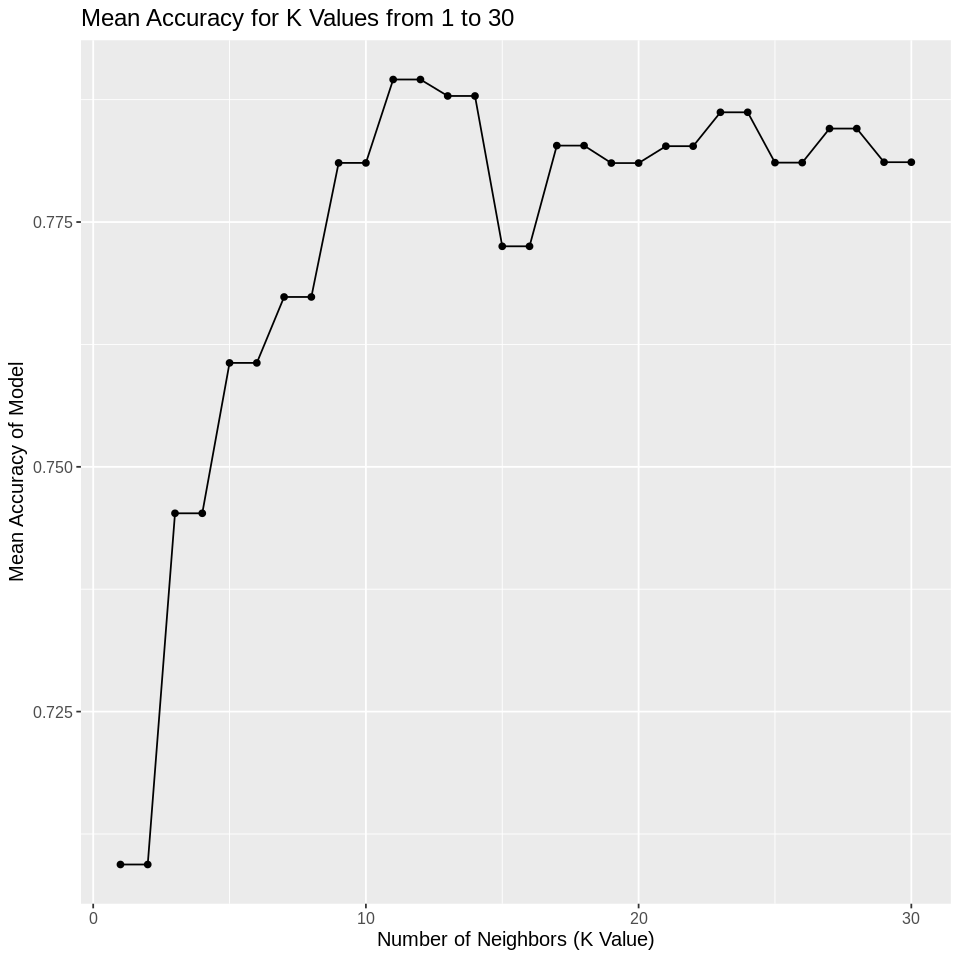

In [41]:
options(repr.plot.width = 8, repr.plot.height = 8)
set.seed(1234)


k_value_plot <- Heart_disease_predictions %>%
ggplot(aes(x=neighbors, y=mean)) +
geom_point()+
geom_line()+
labs(x="Number of Neighbors (K Value)", y="Mean Accuracy of Model")+
ggtitle("Mean Accuracy for K Values from 1 to 30")+
theme(text=element_text(size=12))
k_value_plot
print("Figure 13")

Using the code below we arrange the k values in descending order of their mean value, this arranges the k values with the highest accuracy at the top where we can slice and pull the desired value. This provides us an easier way to find the ideal without eyeballing it.

In [42]:
#picking best k value
set.seed(1234)


best_k_value <- Heart_disease_predictions %>%
    arrange(desc(mean)) %>%
    slice(1)%>%
    pull(neighbors)

figure_14_title
best_k_value

[1] "Figure  14: K Value With the Highest Accuracy"

[1] 11

We can also use code to determine the accuracy of the best value of k. We do this by filtering for the desired k value row and then pulling the mean value and multiplying it by 100 to make it a percent.

In [43]:
#accuracy of k value
set.seed(1234)


mean_accuracy_best_k <- Heart_disease_predictions %>%
    filter(neighbors == best_k_value)%>%
    pull(mean)*100

figure_15_title
mean_accuracy_best_k

[1] "Figure  15: Accuracy of Best K Value"

[1] 78.9556

**3) Make a new model specification for the best parameter value k, and retrain the classifier using the fit function.**

a) Created a new model specification for the best parameter value k 

b) Combined the model specification and recipe into a workflow, and used the fit function to retrain the classifier using our training data.

In [44]:
#create model
set.seed(1234)


#(recipe for reference)
heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestorol + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 

#a)new model with best k value
knn_best_model <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_value) %>%
    set_engine("kknn")%>%
    set_mode("classification") 

#pass the model specification and the training data set to the fit() function. 
heart_disease_fit <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(knn_best_model) %>%
    fit(heart_disease_train)
figure_16_title
heart_disease_fit 

[1] "Figure  16: Heart Disease Workflow"

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_k_value,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2188034
Best kernel: rectangular
Best k: 11

**4) Evaluate the estimated accuracy of the classifier on the test set using the predict function.**
     Using the predict function we use our model to predict the presence of heart disease for our testing data. 
     
     * bind_cols to add the column of predictions to the original test data
     * metrics function from tidymodels to get the statistics about the quality of our model
     * filter for accuracy to determine the accuracy of our model
     
**5) We can pull the estimate and multiply by 100 to get how accurate our model is in percent.** 

In [45]:
#Evalute accuracy
set.seed(1234)
heart_disease_testing_model <- heart_disease_fit %>%
    predict(heart_disease_test) %>%
    bind_cols(heart_disease_test) %>%
    metrics(truth = Presence_of_Heart_Disease, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

percent_accuracy <- heart_disease_testing_model%>%
    pull(.estimate)*100

figure_17_title
percent_accuracy

[1] "Figure  17: Accuracy of Model"

[1] 79.91968

**6) Finally, we created a visualization of our analysis.**
        
        *Created a configuration matrix showing the accurate and inaccurate predictions
        *Created a visualization of this table below for a clearer understanding

In [46]:
set.seed(1234)


heart_predictions <- predict(heart_disease_fit, heart_disease_test) %>%
      bind_cols(heart_disease_test)

heart_conf_mat <- heart_predictions %>%
        conf_mat(truth = Presence_of_Heart_Disease, estimate = .pred_class)    

figure_18_title
heart_conf_mat

[1] "Figure  18: Configuration Matrix of Model"

          Truth
Prediction   N   P
         N  83  22
         P  28 116

**Visualization of Analysis**

After predicting and analyzing our data, we now have our confusion matrix, which shows us the number of correctly predicted classifications per type. This confusion matrix is theoretically a visualization method that tells us our accuracy and resulting answer, but is an ineffective visualization method that is hard for humans to discern and understand, and difficult to manipulate.

The following code is a written function that produces and wrangles the prediction data to returns two tidy dataframes of the data in the conf matrix in a more understandable manner. The function called measurement_func is a function we created that takes in the dataframe that has the prediction column binded to it and compares the prediction column with the actual result column. It takes each element within the prediction vector and directly compares it through the usage of an if-else statement in order to generate a new vector with the result of that prediction.

Using the returned value, which are already tidy, we can easily produce a simple and clear visualization that is much easier to understand than the previous confusion matrix. The step to create the function is important because it now makes our code reproducable, being important for data analysis. 

[1] "Figure  19: Visualization of Model"

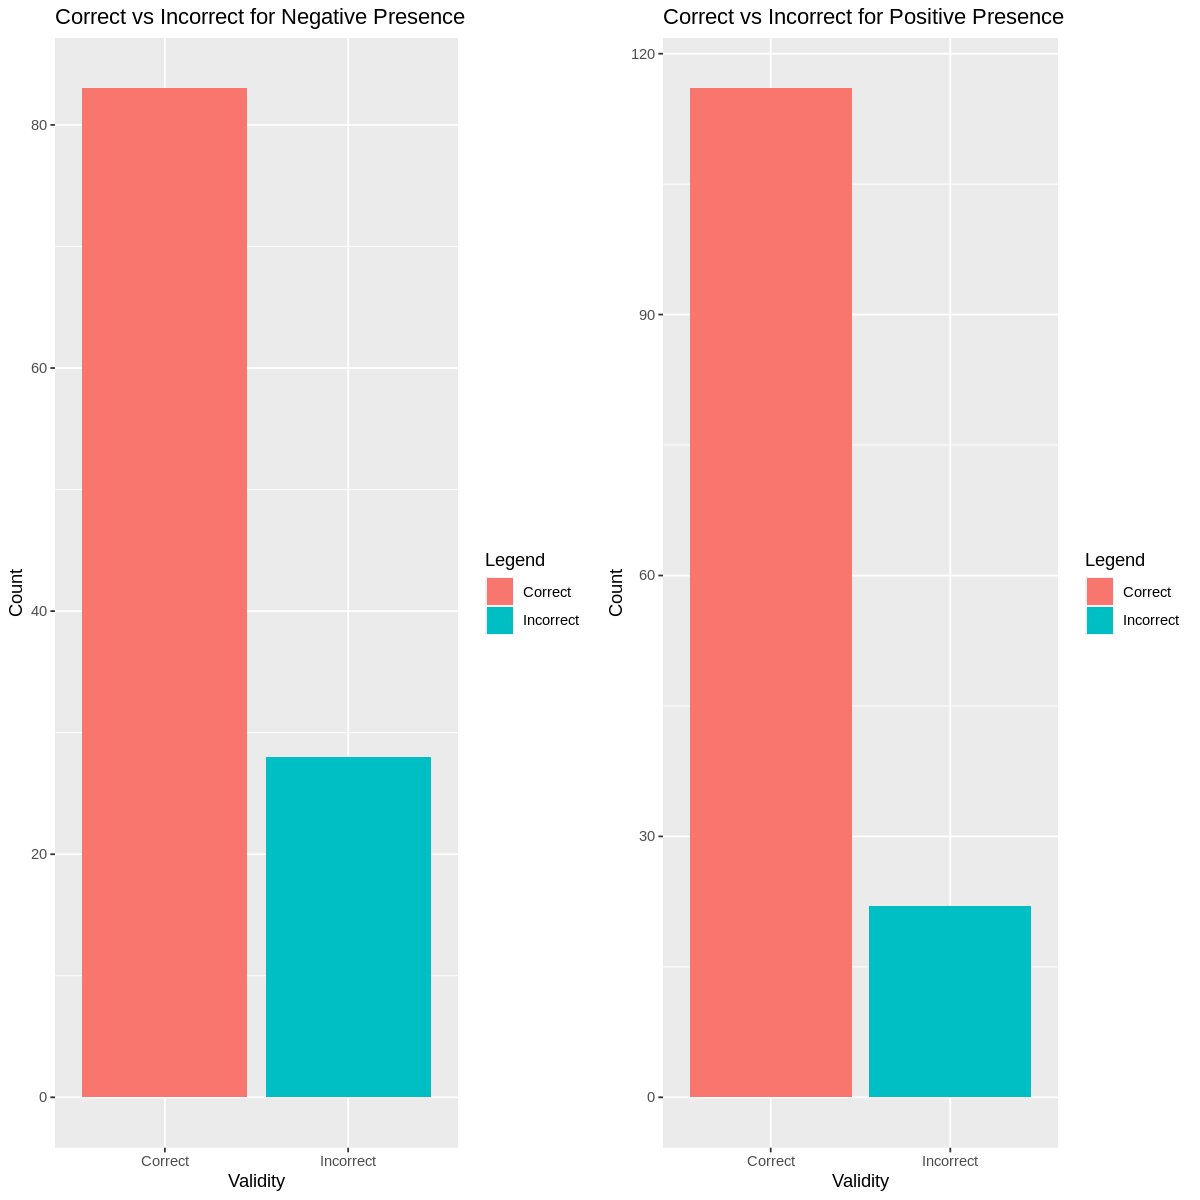

In [47]:
options(repr.plot.width = 10, repr.plot.height = 10)
set.seed(1234)

measurement_func <- function(df) {
    validity_N <- c()
    index_N <- c()
    validity_P <- c()
    index_P <- c()
    for(i in 1:nrow(df)) {
        if((slice(df['Presence_of_Heart_Disease'], i) == "N")) {
            if(slice(df['.pred_class'], i) == "N") {
                validity_N <- c(validity_N, "Correct")
                index_N <- c(index_N, (length(index_N)+1))
            } else {
                validity_N <- c(validity_N, "Incorrect")
                index_N <- c(index_N, (length(index_N)+1))
            }
        } else {
            if(slice(df['.pred_class'], i) == "P") {
                validity_P <- c(validity_P, "Correct")
                index_P <- c(index_P, (length(index_P)+1))
            } else {
                validity_P <- c(validity_P, "Incorrect")
                index_P <- c(index_P, (length(index_P)+1))
            }
        }
    }
    return(list("df1" = data.frame(index_N, validity_N), "df2" = data.frame(index_P, validity_P)))
}

data <- measurement_func(heart_predictions)

graphN <- ggplot(data$df1, aes(x = validity_N, fill = validity_N)) + geom_bar() + labs(x = "Validity", y = "Count", fill = "Legend") + ggtitle("Correct vs Incorrect for Negative Presence")


graphP <- ggplot(data$df2, aes(x = validity_P, fill= validity_P)) + geom_bar() + labs(x = "Validity", y = "Count", fill = "Legend") + ggtitle("Correct vs Incorrect for Positive Presence")

figure_19_title 
plot_grid(graphN, graphP)

**Breakdown of Visualization**

The above graphs each represent a different type of classification: Positive and Negative. The graph on the left are all the Negative classifications and the right graph represents all the Positive classifications. The plotted value on the x-axis are the two validity outcomes: correctly predicted and incorrectly predicted. They are measured using the y-axis of count meaning how many correctly and how many incorrectly predicted outcomes. The left graph plots the number of  negative predictions: if the model predicts "N", it is correct. If predicted "P" it is incorrect. The right graph is the same with positive predictions: if the model predicts "P" it is correct, predicting "N" results an incorrect outcome. 

We decided to graph the negative vs positive results seperately because in medical diagnosis, predicting correctly when the diagnosis is positive is much more important than predicting correctly when the diagnosis is negative. It is important to separate the data to see clearly how well our analysis model is doing on each result. The graphs produced make it quite clear that our model works much better when predicting positive results then when predicting negative results which is a good thing. When the actual result was positive, our model predicted 116 counts correctly and only 22 counts incorrectly resulting in a accuracy of around 85%. When comparing to predicting negative results, we had our model predict 83 correct results and 28 incorrect results which means for negative diagnosis', we had an accuracy of 75%. 

This is great seeing as we have 10% more accurate positive predictions and that is a huge difference since predicting wrong on a negative diagnosis results in a check-up and possible spending of money, but no mortal or fatal outcomes. Whereas if we predict wrong on a positive diagnosis, the patient would not recieve follow-up treatment which could result in disastrous outcomes and terrible medical hinderences. 

Despite the fact that our model performs better on positive diagnosis' when compared to negative, it is still not completely accurate when predicting heart disease. Further follow up from a doctor is required if our model is used in the medical field as a early warning for heart disease. 

**Discussion**

Through our model we were able to determine that if you use age, blood pressure, and cholesterol levels, type of chest pain and heart rate of an individual, you can predict the presence of heart disease with around 80 percent accuracy. This accuracy does enable us to determine the presence of heart disease using these variables; however, In the context of this data, this accuracy causes this method of determining heart disease to be impractical as determining this severe medical condition should be more accurate than 80%, because it can be a life or death diagnosis.  We expected to find that the Age, blood pressure, and cholesterol levels are all associated with heart disease development, and there seems to be a major correlation, however, none of these predictors are sure signs that an individual has heart disease, which is what we ended up finding. The final analysis matched what we predicted: we can use these variables to predict whether or not an individual has heart diseas at a decently high accuracy rate. 

These findings could serve as a preliminary testing process. The model predicts that an individual who has heart disease does not have heart disease about 11% of the time. The model predicts that an individual with heart disease has heart disease about 47% of the time and only incorrectly predicts that an individual without heart disease has heart disease around 9% of the time. This means that if the model predicts that someone has heart disease, it would be very beneficial to quickly get that individual more testing to determine for sure whether or not they have heart disease. This could lead to future questions about how to improve the model. Could we build a model that rated how likely a person was to have heart disease, providing a way to decide who needed help most urgently? Are there other predictors that could more accurately determine presence of heart disease? Could we build a model that can administer treatements based on the different underlying factors/predictors despite the same outcome?


**References**

Lopez, E., Ballard, B. and Jan, A., 2021. Cardiovascular Disease. [online] Ncbi.nlm.nih.gov. Available at: <https://www.ncbi.nlm.nih.gov/books/NBK535419/> [Accessed 6 December 2021].
 
Archive.ics.uci.edu. 2021. UCI Machine Learning Repository: Heart Disease Data Set. [online] Available at: <https://archive.ics.uci.edu/ml/datasets/Heart+Disease> [Accessed 6 December 2021].
 
Carole L. Hart, David J. Hole and George Davey Smith,  2000. Comparison of Risk Factors for Stroke Incidence and Stroke Mortality in 20 Years of Follow-Up in Men and Women in the Renfrew/Paisley Study in Scotland. [online]  Available at: https://www.ahajournals.org/doi/full/10.1161/01.STR.31.8.1893 [Accessed 6 December 2021].

S Nilsson, M Scheike, D Engblom, et al, 2003. Chest pain and ischaemic heart disease in primary care. [online] Available at: https://bjgp.org/content/bjgp/53/490/378.full.pdf [Accessed 6 December 2021].
